In [50]:
# load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [51]:
# load data from a csv file
file_path = "./data/zomato_df_final_data.csv"
df = pd.read_csv(file_path)

In [52]:
# explore the data
df.head()

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


In [53]:
# view the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [54]:
# no of numerical columns
numerical_columns = ["cost", "lat", "lng", "rating_number", "votes", "cost_2"]

# no of categorical columns
categorical_columns = [
    "address",
    "cuisine",
    "link",
    "phone",
    "rating_text",
    "subzone",
    "title",
    "type",
    "groupon",
    "color",
    "cuisine_color",
]

## Cleaning and Preprocessing the dataset


In [55]:
# check the shape of the data
df.shape

(10500, 17)

In [56]:
# checking for duplicate records
df.duplicated().sum()

# fetch the duplicate records from the dataset
# get the original records
df[df.duplicated(keep=False)]

# drop the duplicate record
df_cleaned = df.drop_duplicates()

In [57]:
# check the columns with missing values
df_cleaned.isnull().sum()

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64

In [62]:
# Convert string representation of lists to actual lists
df_cleaned["cuisine"] = df_cleaned["cuisine"].apply(ast.literal_eval)

# Convert string representation of lists to actual lists, for the type column, ignore the error
# replace nan with empty list
df_cleaned["type"] = df_cleaned["type"].fillna("[]")
df_cleaned["type"] = df_cleaned["type"].apply(ast.literal_eval)

C:\Users\ajult\AppData\Local\Temp\ipykernel_11564\3897795372.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["type"] = df_cleaned["type"].fillna("[]")
C:\Users\ajult\AppData\Local\Temp\ipykernel_11564\3897795372.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["type"] = df_cleaned["type"].apply(ast.literal_eval)


In [ ]:
df_cleaned["cuisine"].head()

In [63]:
df_cleaned["type"].head()

0       [Casual Dining]
1                [Café]
2         [Fine Dining]
3    [Fine Dining, Bar]
4       [Casual Dining]
Name: type, dtype: object

## Exploratory Data Analysis


### How many unique cuisines are served by Sydeney Restaurants ?


In [65]:
# let's check frequency distribution of the categorical columns
# let's aggregate the cusines column, i.e merge all lists in cusines column into one list
cuisine_list = []
for cuisine in df_cleaned["cuisine"]:
    cuisine_list.extend(cuisine)

# convert the list to a pandas series
cuisine_series = pd.Series(cuisine_list)

# view the data
cuisine_series.head()

# get unique values
cuisine_series.unique()

# get count of each unique value
cuisine_series.value_counts()

Cafe                 3162
Modern Australian     981
Chinese               863
Italian               820
Pizza                 744
                     ... 
Swiss                   1
Dutch                   1
Kiwi                    1
Syrian                  1
Ukrainian               1
Name: count, Length: 134, dtype: int64

In [66]:
# total no. of unique values
cuisine_series.nunique()

134

In [67]:
# let's plot the top 15 cuisines
top_15_cuisines = cuisine_series.value_counts().head(15)
top_15_cuisines

Cafe                 3162
Modern Australian     981
Chinese               863
Italian               820
Pizza                 744
Thai                  703
Japanese              578
Asian                 536
Burger                505
Indian                402
Seafood               388
Vietnamese            361
Sushi                 335
Pub Food              332
Bar Food              330
Name: count, dtype: int64

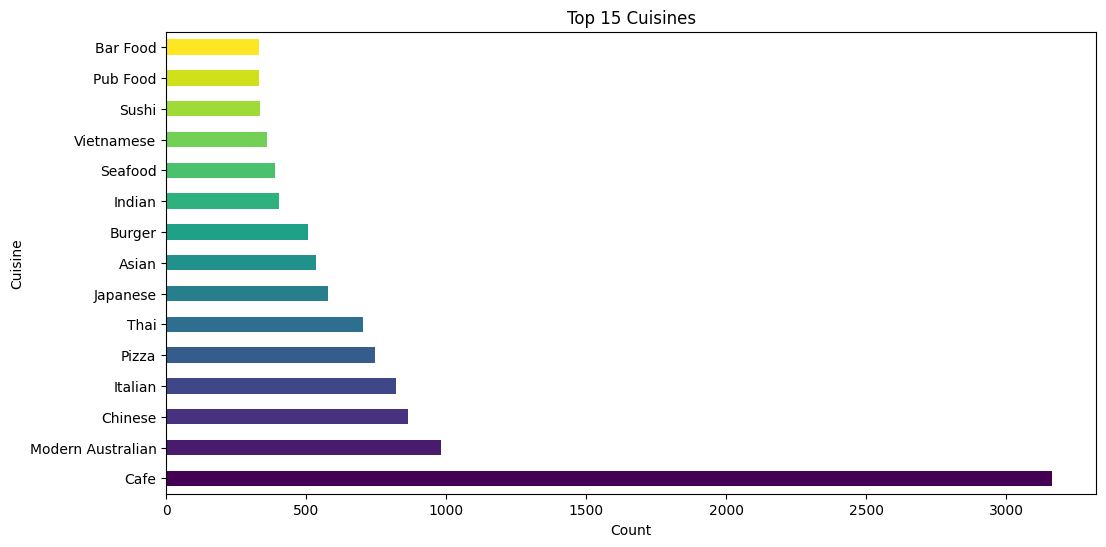

In [68]:
# let's plot the top 15 cuisines as horizontal bar chart

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_15_cuisines)))
top_15_cuisines.plot(kind="barh", color=colors)
plt.title("Top 15 Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

**Observations**

- A total of 134 unique cuisines are served by Sydney Restaurants.

- Modern Australian Cuisine is the most common cuisine, followed by Chinese and Italian cuisines.


### Which Suburb has the highest number of restaurants ?


In [69]:
# let's check the unique subzones
df_cleaned["subzone"].nunique()

572

In [70]:
# let's check the frequency distribution of subzones
df_cleaned["subzone"].value_counts()

subzone
CBD                                         476
Surry Hills                                 260
Parramatta                                  225
Darlinghurst                                188
Chinatown                                   174
                                           ... 
The Sydney Boulevard Hotel, Darlinghurst      1
Pullman Quay Grand Sydney Harbour, CBD        1
Chullora                                      1
Marriott Sydney Harbour, Circular Quay        1
Holiday Inn Old Sydney, The Rocks             1
Name: count, Length: 572, dtype: int64

In [71]:
# top 10 subzones with highest no. of restaurants
top_10_subzones = df_cleaned["subzone"].value_counts().head(10)
top_10_subzones

subzone
CBD             476
Surry Hills     260
Parramatta      225
Darlinghurst    188
Chinatown       174
Newtown         160
Blacktown       123
Potts Point     120
Manly           117
Bondi Beach     113
Name: count, dtype: int64

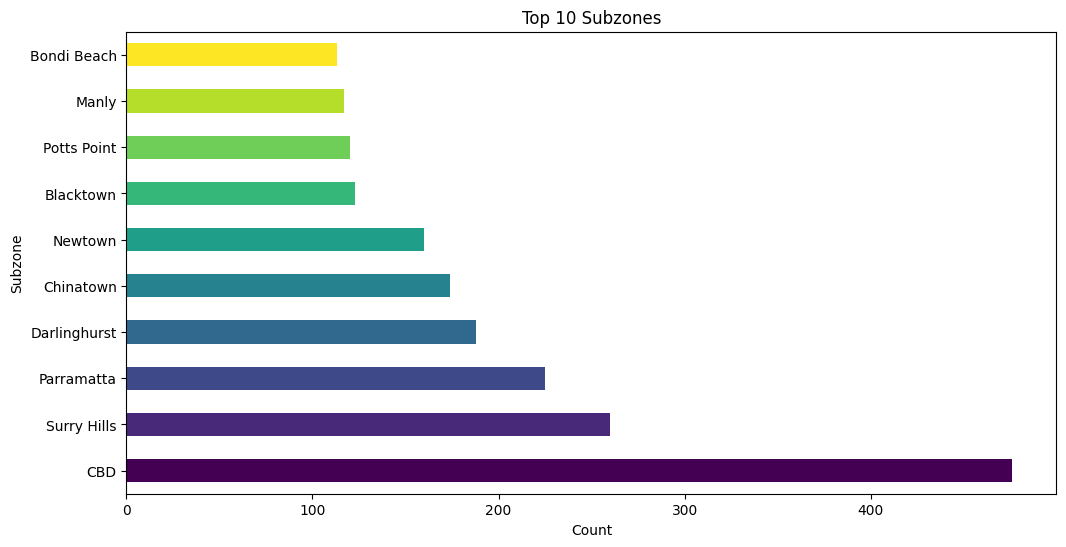

In [72]:
# let's plot the top 10 subzones
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_subzones)))
top_10_subzones.plot(kind="barh", color=colors)
plt.title("Top 10 Subzones")
plt.xlabel("Count")
plt.ylabel("Subzone")
plt.show()

**Observations**

- **CBD** has the highest no of restaurants in sydney, followed by **Surry Hills** and **Parramatta**


### Is there a relationship between the cost and rating of the restaurant ?


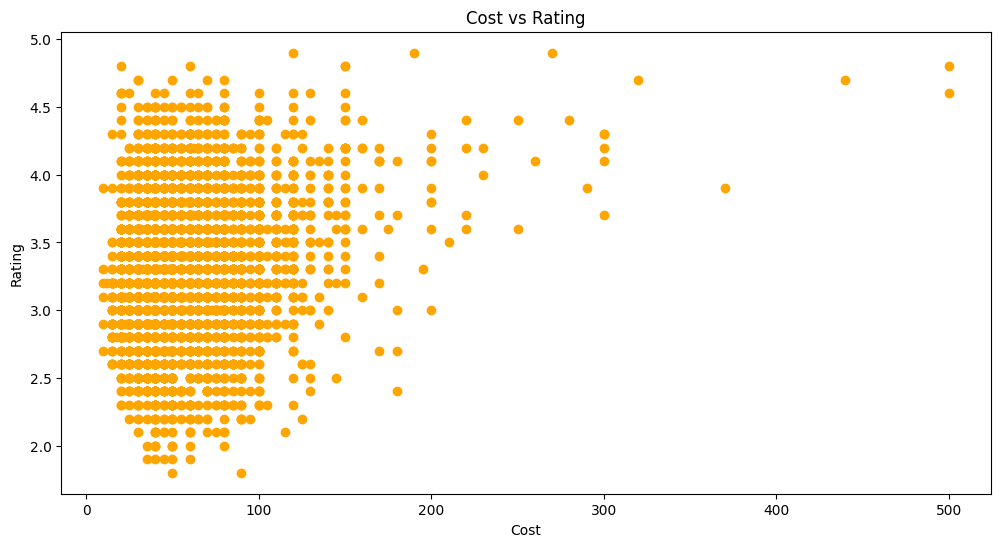

In [73]:
# Scatter plot of cost vs rating
plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned["cost"], df_cleaned["rating_number"], color="orange")
plt.title("Cost vs Rating")
plt.xlabel("Cost")
plt.ylabel("Rating")
plt.show()

**Observations**

- There's no strong positive correlation between cost and rating. Higher cost doesn’t necessarily mean better ratings. Some high-cost items have relatively low ratings, and some low-cost items have high ratings.


### What are the different types of Restaurants in Sydney ? What type of restaurants are more common ?


In [75]:
# let's aggregate the type column, i.e merge all lists in type column into one list
type_list = []
for type in df_cleaned["type"]:
    type_list.extend(type)

# convert the list to a pandas series
type_series = pd.Series(type_list)

# view the data
type_series.head()

0    Casual Dining
1             Café
2      Fine Dining
3      Fine Dining
4              Bar
dtype: object

In [76]:
# get the unique values
type_series.unique()

array(['Casual Dining', 'Café', 'Fine Dining', 'Bar', 'Dessert Parlour',
       'Wine Bar', 'Fast Food', 'Bakery', 'Food Court', 'Pub',
       'Food Truck', 'Club', 'Beverage Shop', 'Food Stall'], dtype=object)

In [77]:
# total no. of unique values
type_series.nunique()

14

In [78]:
# get count of each unique value
type_series.value_counts()

Casual Dining      5566
Café               3169
Bar                 692
Fast Food           587
Food Court          543
Pub                 382
Bakery              174
Fine Dining         113
Wine Bar            106
Dessert Parlour      67
Beverage Shop        17
Food Truck           16
Club                 12
Food Stall            2
Name: count, dtype: int64

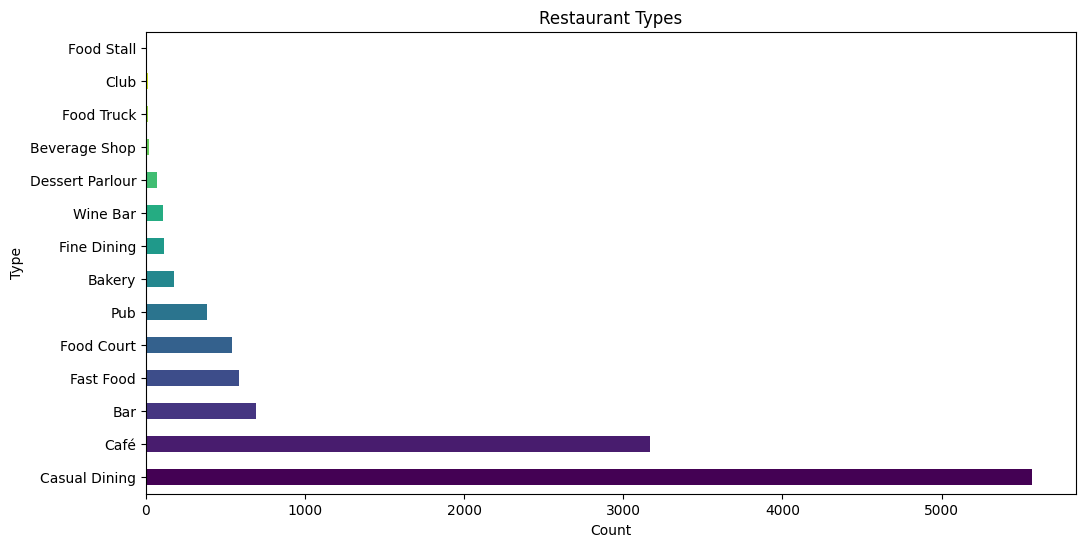

In [79]:
# let's plot the restaurant types
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(type_series.value_counts())))
type_series.value_counts().plot(kind="barh", color=colors)
plt.title("Restaurant Types")
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()

**Observations:**

- **Casual Dining** Restaurants are most common in Sydney, followed by **Café** and **Bar**
- There are a total of 14 different resturant types operating in Sydney


References:

[1] https://stackoverflow.com/questions/1894269/how-to-convert-string-representation-of-list-to-a-list
